<a href="https://colab.research.google.com/github/xz240/TensorFlow/blob/master/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using tf.keras

Goal of the project: This is a practice of using tf.keras to image classification. The proceduce will include importing packages, Data loading, Data augmentation (solve overfittign problems), create the CNN, compile the Model, Train the model, and plot training and validation graphs.

Then I will take a paragraph to experiment with different parameters.

# Importing Libraries and downloading file

In [6]:
## Importing Packages

# Write the line, the code can work both with Python 3 and Python 2
# os - read files and directory structure
# numpy - convert list to numpy array and to perform matrix operations
# glob - return a possibly-empty list of path names to find file&folder
# shutil - operate on files adn collections of files
# matplotlib.pyplot - plot graph and display images for training&validation data
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

# Import Tensorflow as tf and keraa layer and model for CNN
# ImageDataGenerator from Keras - perform image augmentation
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Loading
# tf.keras.utils.get_file - download the dataset and store it to "/tmp/" directory
# zip_file - return "/root/.keras/datasets/flower_photos.tgz"
# os.path.dirname(zip_file) - return directory of zip_file "/root/.keras/datasets"
# os.path.join - join "/root/.keras/datasets" and "flower_photos", add "/"

_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

# simply check the result of path
print ("Folder of zipfile:", os.path.dirname(zip_file))
print ("Full directory of zip_file:", zip_file)
print ("Directory of data files:", base_dir)

Folder of zipfile: /root/.keras/datasets
Full directory of zip_file: /root/.keras/datasets/flower_photos.tgz
Directory of data files: /root/.keras/datasets/flower_photos


# Understand the data and directory structure
The dataset I have downloaded has following directory structure.
<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

There is not folders containing training and validation data. I will write some code to do this. And then moves the images from the original folders to these new folders, let's say 80% of the images go to training set and 20% of the images go to the validation set. 

In the end, the original folders will be empty, the structure looks like the following structure, and I print the total number of flower images we have for each type of flower:
<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>dandelion</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>roses</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>sunflowers</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>tulips</b>: [1.jpg, 2.jpg, 3.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

# Creating the training and validation dataset

In [7]:
# Create the labels for these 5 classes
# glob.glob() return all matching file names with directory
classes = ['daisy','dandelion','roses','sunflowers','tulips']

# os.makedirs - makes all intermediate-level directories needed to contain the leaf directory.
# shutil.move(src, dst) - Recursively move a file or directory (src) to another location (dst)
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path +'/*.jpg')
  print("{}:  {} Images".format(cl, len(images)))
  # ???????
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
  
  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    try:
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    except:
        print(t, " exists")
  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val' , cl))
    try: 
        shutil.move(v, os.path.join(base_dir, 'val' , cl))
    except:
        print (v, " exists!" )

# set up the path for the training and validation sets
train_dir = os.path.join(base_dir, 'train')
vir_dir = os.path.join(base_dir, 'val')


daisy:  633 Images
/root/.keras/datasets/flower_photos/daisy/446484749_4044affcaf_n.jpg  exists
/root/.keras/datasets/flower_photos/daisy/1441939151_b271408c8d_n.jpg  exists
/root/.keras/datasets/flower_photos/daisy/299129811_d6ebda9970.jpg  exists
/root/.keras/datasets/flower_photos/daisy/8742143296_fed9fa007c.jpg  exists
/root/.keras/datasets/flower_photos/daisy/134409839_71069a95d1_m.jpg  exists
/root/.keras/datasets/flower_photos/daisy/2908212142_5437fa67ff_n.jpg  exists
/root/.keras/datasets/flower_photos/daisy/2538504987_fe524b92a8_n.jpg  exists
/root/.keras/datasets/flower_photos/daisy/5981645737_29eceac291_m.jpg  exists
/root/.keras/datasets/flower_photos/daisy/4301689054_20519e5b68.jpg  exists
/root/.keras/datasets/flower_photos/daisy/4724713781_d169f98a35.jpg  exists
/root/.keras/datasets/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg  exists
/root/.keras/datasets/flower_photos/daisy/4482623536_b9fb5ae41f_n.jpg  exists
/root/.keras/datasets/flower_photos/daisy/16819071290_4

# Overfitting
Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.
In tf.keras we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

# Data Augmentation

Found 2935 images belonging to 5 classes.


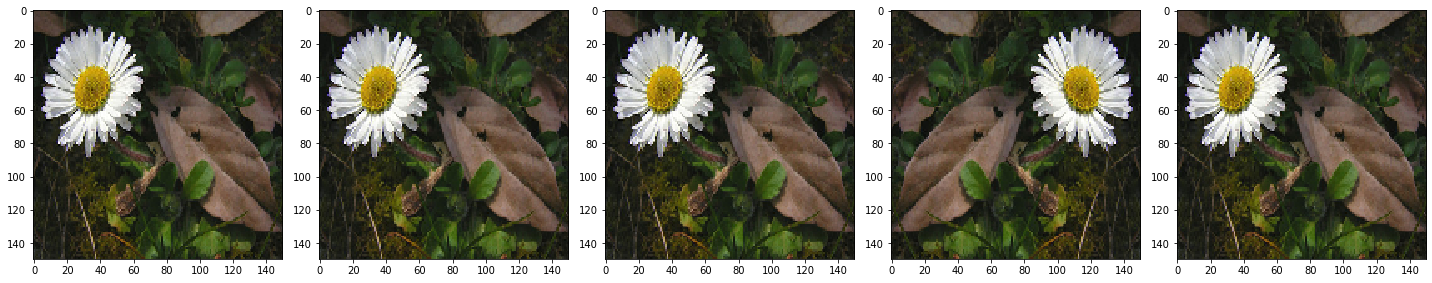

In [12]:
# create a batch_size of 100 images and set a value to IMG_SHAPE such that our training data consists of images with width of 150 pixels and height of 150 pixels.
batch_size = 100
img_shape = 150

# Rescale the images and apply Random Horizontal Flip
# Indicate the batch size, the path to thte directory of the training images,target images size and to shuffle the images
# ImageDataGenerator - randomly transforms data, and returns only the new, more options see https://keras.io/preprocessing/image/ 
# flow_from_directory - indentify classes automatically from the folder name
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
train_data_gen = image_gen.flow_from_directory (
                                                batch_size = batch_size,
                                                directory = train_dir,
                                                shuffle = True,
                                                target_size = (img_shape, img_shape)
                                                )
# Result check - plot images in the form of a grid with 1 row and 5 columns
def plotImages (images_arr):
    fig, axes = plt.subplots (1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages (augmented_images)
